In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
x = np.random.rand(100,1) - 0.5
y = 3*x[:,0]**2 + 0.05 * np.random.randn(100)

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame()

In [6]:
df['x'] = x.reshape(100)
df['y'] = y

In [7]:
df

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

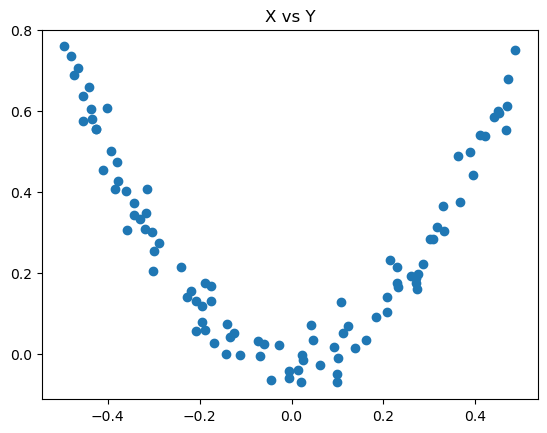

In [9]:
plt.scatter(df['x'],df['y'])
plt.title('X vs Y')

In [10]:
df['pred_1'] = df['y'].mean()

In [11]:
df

,x,y,pred_1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [12]:
df['res1'] = df['y'] - df['pred_1'] #pseudo resudual = acutal - pred

In [13]:
df

,x,y,pred_1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


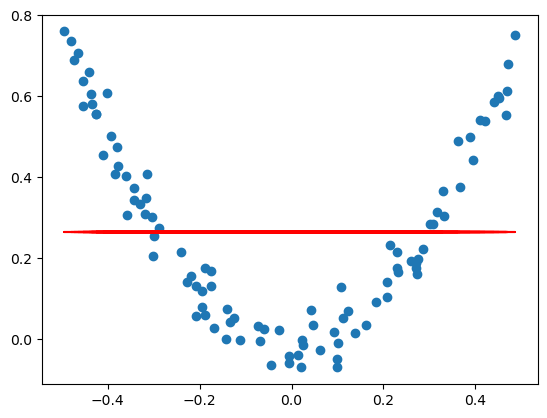

In [14]:
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],df['pred_1'],color = 'red')

In [15]:
# step 2 Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [17]:
tree1 = DecisionTreeRegressor(max_leaf_nodes = 8)

In [18]:
tree1.fit(df['x'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

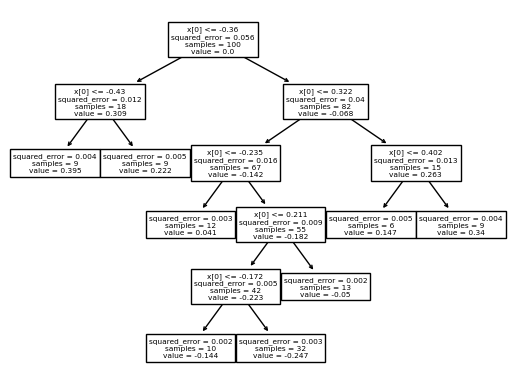

In [19]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [20]:
x_test = np.linspace(-0.5,0.5,500)

In [22]:
y_pred = 0.265458 + tree1.predict(x_test.reshape(500,1))  # mean of model1 = model1's output + output of model 2

In [23]:
y_pred

array([0.66091194, 0.66091194, 0.66091194, 0.66091194, 0.66091194,
       0.66091194, 0.66091194, 0.66091194, 0.66091194, 0.66091194,
       0.66091194, 0.66091194, 0.66091194, 0.66091194, 0.66091194,
       0.66091194, 0.66091194, 0.66091194, 0.66091194, 0.66091194,
       0.66091194, 0.66091194, 0.66091194, 0.66091194, 0.66091194,
       0.66091194, 0.66091194, 0.66091194, 0.66091194, 0.66091194,
       0.66091194, 0.66091194, 0.66091194, 0.66091194, 0.66091194,
       0.48779642, 0.48779642, 0.48779642, 0.48779642, 0.48779642,
       0.48779642, 0.48779642, 0.48779642, 0.48779642, 0.48779642,
       0.48779642, 0.48779642, 0.48779642, 0.48779642, 0.48779642,
       0.48779642, 0.48779642, 0.48779642, 0.48779642, 0.48779642,
       0.48779642, 0.48779642, 0.48779642, 0.48779642, 0.48779642,
       0.48779642, 0.48779642, 0.48779642, 0.48779642, 0.48779642,
       0.48779642, 0.48779642, 0.48779642, 0.48779642, 0.48779642,
       0.30596421, 0.30596421, 0.30596421, 0.30596421, 0.30596

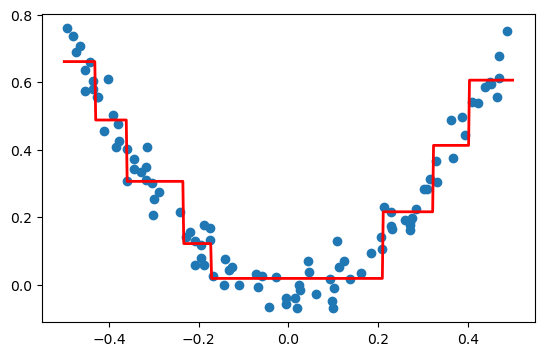

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test,y_pred,linewidth = 2,color = 'red')
plt.scatter(df['x'],df['y'])

#m1+m2

In [26]:
df['pred_2'] = 0.265458 + tree1.predict(df['x'].values.reshape(100,1))

In [27]:
df

,x,y,pred_1,res1,pred_2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [28]:
df['res2'] = df['y'] - df['pred_2']

In [29]:
df

,x,y,pred_1,res1,pred_2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [30]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [31]:
tree2.fit(df['x'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [37]:
y_pred = 0.265458 + sum(regressor.predict(x_test.reshape(-1,1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'x vs y')

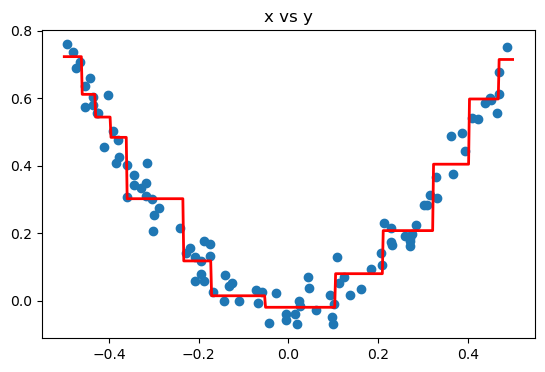

In [39]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test,y_pred,linewidth = 2,color = 'red')
plt.scatter(df['x'],df['y'])
plt.title('x vs y')

In [40]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)


5


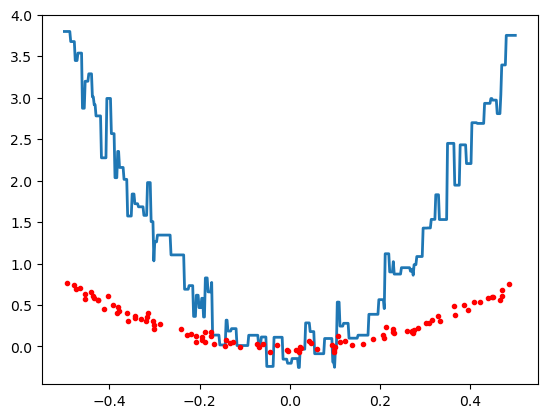

4


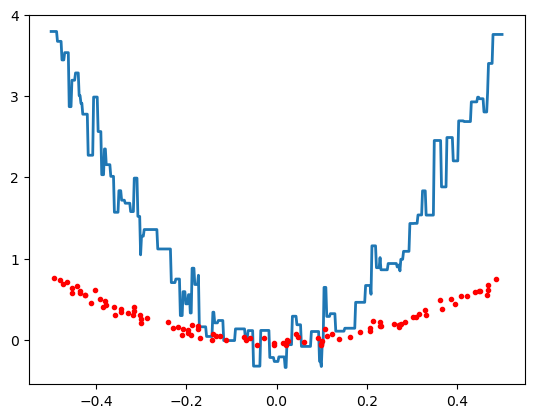

3


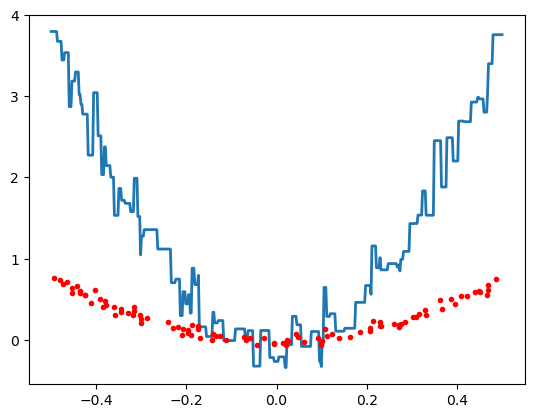

2


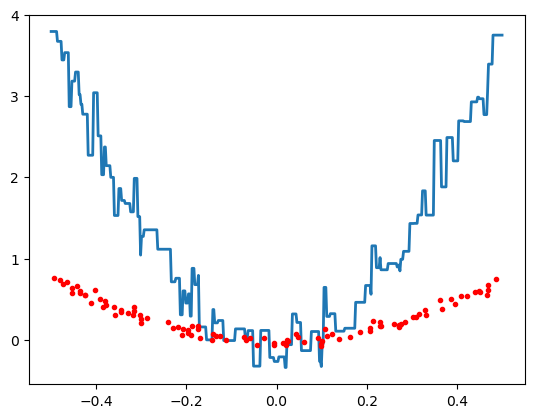

1


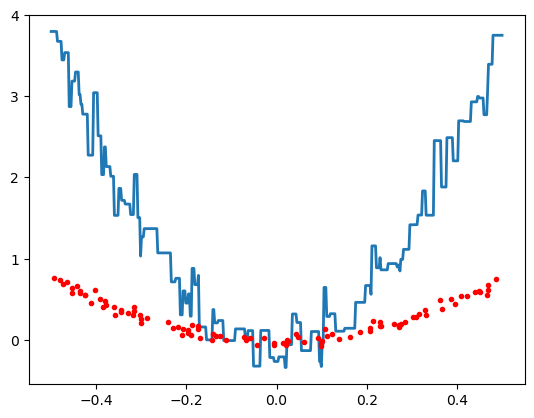

In [45]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)